__<span style="font-size: 35px;">Apple and Google Products Tweet Classification</span>__   

---

__<font size="6">1. Business Understanding</font>__   

***<span style="font-size: 24px;">1.1 Overview</span>***

Apple and Google are global technology companies which offer a variety of electronic products and software services. Like any big company there is public opinion of the products and services they bring to the market. As leaders in the competitive tech industry, their operations depend heavily on customer satisfaction and public perception of their brands.Customer sentiment plays a key role for both companies. Negative opinions expressed online can affect brand image and influence purchasing decisions. By analyzing customer feedback from social media platforms such as Twitter, these companies can gain insights into how users feel about their products and services. This can help identify areas for improvement, respond to customer concerns and strengthen their brand reputation.

 


---

***<span style="font-size: 24px;">1.2 Problem Statement</span>*** 

Apple and Google’s success rely heavily on maintaining strong customer satisfaction and positive public perception. With users actively sharing opinions on Twitter, analyzing this feedback has become important for improving products and strengthening brand reputation.
The main challenge is effectively analyzing this data to understand customer sentiment. To address this, this project builds a sentiment analysis model that classifies tweets about Apple and Google products into positive, negative or neutral categories. 

---

***<span style="font-size: 24px;">1.3 Business Objective</span>*** 

**Main Objective** 

The main objective of this project is to develop a sentiment classification model that analyzes tweets about Apple and Google products and classifies them as positive, negative or neutral.


**Specific Objectives**  
The specific objectives of the project are:
1. Determine the products and services from Apple or Google  that have the  largest  negative, positive and neutral feedback.
2. Preprocess the data through processes such as; Vectorization and tokenization, handling missing values, and creating new features with respect to user behavior.
3. Evaluate the model  performance using Precison, Recall, and F1score.
4. Identify the most signficant features and important tokens.
5. Compare different classification models to determine which performs best for this dataset.


---

***<span style="font-size: 24px;">1.4 Research Questions</span>***   
1. Which products have the largest negative, positive and neutral feedbak?
2. Which features influence user behavior?
3. Which classifier model had the best Precison, Recall and F1 score?


---

***<span style="font-size: 24px;">1.5 Success Criteria</span>***    

The success of this project will be assessed in three ways:
1. It should generate insights into how users feel about their products and services.
2. We should successfully develop a machine learning model that automatically determines the sentiment of a tweet based on words and tone used in the text.
 



---


__<font size="6">2. Data Understanding</font>__  

The dataset was sourced from CrowdFlower. It contains over 9000 tweets showing customer sentiments towards Apple or Google products.

It consists of 9093 rows and 3 columns.

# Data loading and Inspection

The Twitter sentiment dataset is loades from a CSV files into Pandas DataFrame. We perform basic inspection 

In [374]:
# import pandas 
import pandas as pd
# uploading a dataset
data=pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

# display the first five rows of the dataset
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The columns include:
1. `tweet_text`: The text content of the tweet used dor classification
2. `motion_in_tweet_is_directed_at`: The company which the tweet is expressed to
3. `is_there_an_emotion_directe_at_a_brand_or_product`: serves as the target label of classification. Indicates the emotion expressed at a brand or product.

In [375]:
# check the shape of the dataset
data.shape

(9093, 3)

-  Dataset has 9093 rows and 3 columns

In [376]:
# display data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- All columns are the object data type.

In [377]:
data.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

The `emotion_in_tweet_is_directed_at` column has 5802 missing values. 

Renaming the columns, in order to understand them better and flexibility

In [378]:
# rename the columns in the dataset
def rename_columns(df):
   df.columns = ['tweet', 'tweet_directed_at', 'sentiment']
   return df

data= rename_columns(data)
data.head()

,tweet,tweet_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [379]:
# Check the unique values in 'sentiment'
data['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

- The dataset contains four sentiment categories: `Positive emotion`, `Nefative Emotion`, `No emotion toward the brand or product` and `I can't tell`

- We Merge `No emotion toward the brand or product` and `I can't tell` into `Neutral emotion` category

In [380]:
# Combine the 'No emotion toward brand or product' and 'I can't tell' into a single category
data['sentiment'] = data['sentiment'].replace(
    {
        "No emotion toward brand or product": "Neutral emotion",
        "I can't tell": "Neutral emotion",
    }
)

# check the unique values in the sentiment column
print("Unique Sentiments:")
print(data['sentiment'].unique())

Unique Sentiments:
['Negative emotion' 'Positive emotion' 'Neutral emotion']


Checking for missing values an duplicate values in the dataset

In [381]:
# checking for missing value
data.isna().sum()

tweet                   1
tweet_directed_at    5802
sentiment               0
dtype: int64

- The `tweet_directed_at_columns` has numerous missing values. They are replaced with the string `Not directed` 

In [382]:
import warnings
warnings.filterwarnings('ignore')

In [383]:
# Fill the missing values in 'tweet_directed_at' column with 'Not directed'
data['tweet_directed_at'].fillna('Not directed', inplace=True)

# Drop the missing value in 'tweet' column
data.dropna(subset=['tweet'], inplace=True, axis=0)

# Check again for missing values
data.isna().sum()

tweet                0
tweet_directed_at    0
sentiment            0
dtype: int64

- Next Check for duplicate rows

In [384]:
#check for duplicate values
data.duplicated().sum()

22

- There are 22 duplicate rows in the dataset. Drop the duplicated entirely

In [385]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

fetch the summary statistics of the data

In [386]:
data.describe()

,tweet,tweet_directed_at,sentiment
count,9070,9070,9070
unique,9065,10,3
top,RT @mention RT @mention It's not a rumor: Appl...,Not directed,Neutral emotion
freq,2,5788,5531


## Data Preprocessinng

In [387]:
# filtering based on complex patterns

import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
# create a regex pattern that joins the stopwords together

tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:'[a-z]+)?")

# create a list of stopword in english
stopwords_list = set(stopwords.words('english'))

# stemming (reducing words to their root form)
stemmer = PorterStemmer()



### Lowercasing & punctuation removal + tokenization

In [388]:

# preprocessung data
def preprocess_text(text,tokenizer,stopwords_list,stemmer):
   if not isinstance(text, str):
        return ""
   # standardise case(lower case)
   text = text.lower()
   # remove URLs
   text = re.sub(r"http\S+|www\S+|https\S+", '', text) 
   # remove hashtags and mentions
   text = re.sub(r'@\w+|#\w+','', text)

   # tokenize 
   tokens = tokenizer.tokenize(text)
   # remove stopword using stopwords_list
   filtered_tokens = [word for word in tokens if word not in stopwords_list]
   
   # Remove punctuation using regex
   cleaned_tokens = [re.sub(r"[^\w\s]", "", word) for word in filtered_tokens if re.sub(r"[^\w\s]", "", word) != ""]
   
   # stem the tokenized text using stemmer
   stemmed_tokens = [stemmer.stem(word) for word in cleaned_tokens]

   # return the preprocessed text
   return stemmed_tokens

In [389]:
text_data = data.tweet.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list,stemmer))
text_data

0       [g, iphon, hr, tweet, dead, need, upgrad, plug...
1       [know, awesom, ipad, iphon, app, like, appreci...
2                                      [wait, also, sale]
3          [hope, year, festiv, crashi, year, iphon, app]
4       [great, stuff, fri, marissa, mayer, googl, tim...
                              ...                        
9088                              [ipad, everywher, link]
9089    [wave, buzz, rt, interrupt, regularli, schedul...
9090    [googl, zeiger, physician, never, report, pote...
9091    [verizon, iphon, custom, complain, time, fell,...
9092                [rt, googl, test, check, offer, link]
Name: tweet, Length: 9070, dtype: object

In [390]:
data["preprocessed_text"] = text_data
data.head()

,tweet,tweet_directed_at,sentiment,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[g, iphon, hr, tweet, dead, need, upgrad, plug..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesom, ipad, iphon, app, like, appreci..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, year, festiv, crashi, year, iphon, app]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, googl, tim..."


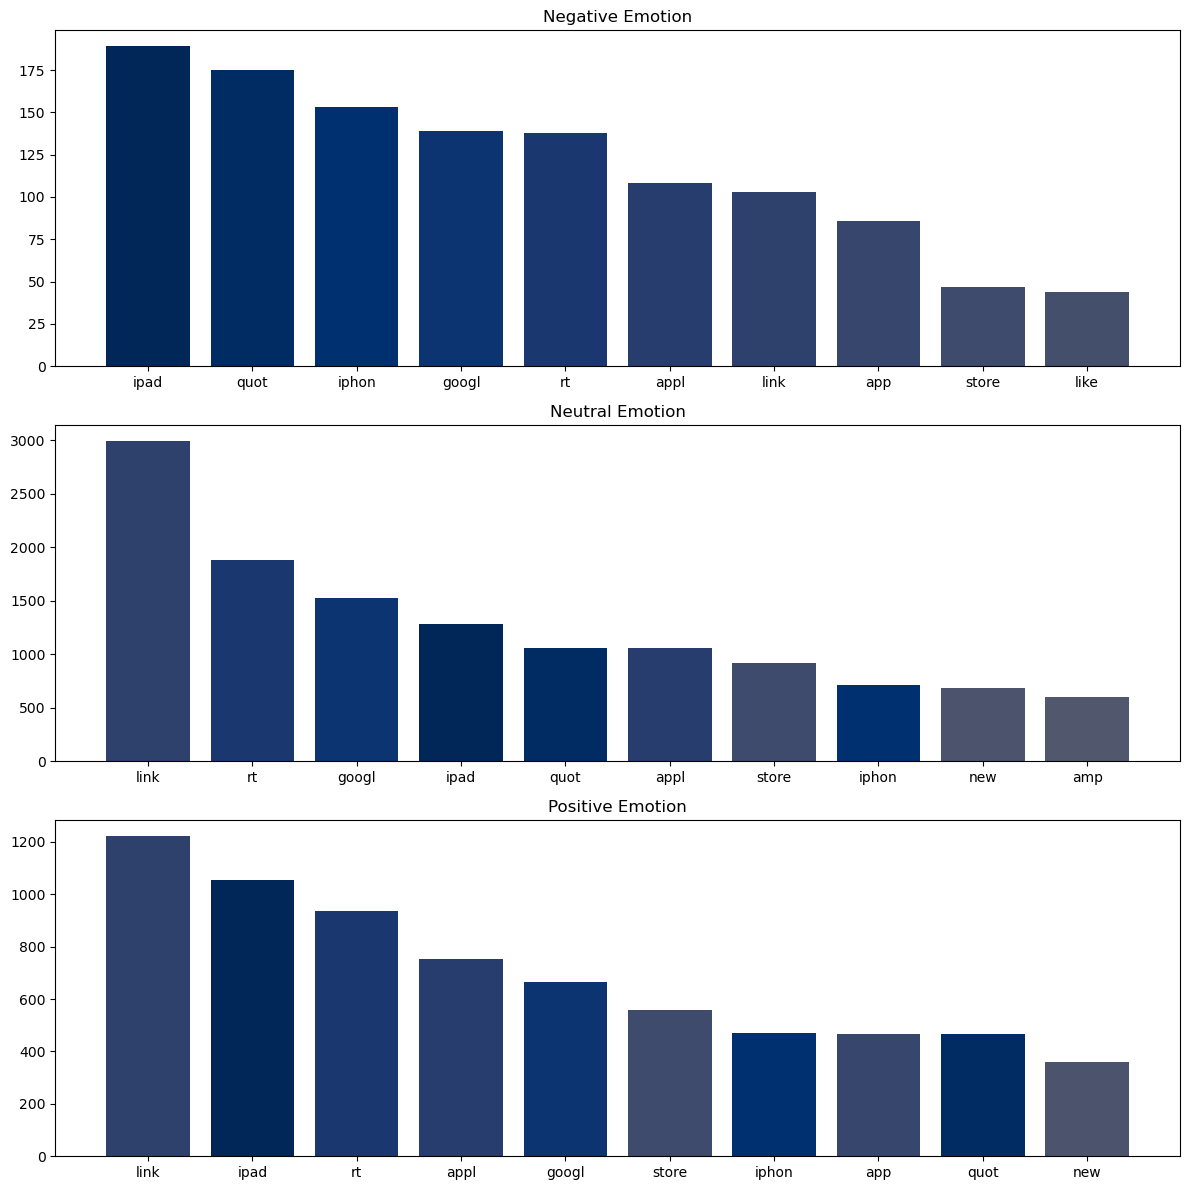

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=3, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each unique genre
data_by_emotion = [y for _, y in data.groupby('sentiment', as_index=False)]
for idx,emotion_df in enumerate(data_by_emotion):
    # Find top 10 words in this genre
    all_words_in_emotion = emotion_df.preprocessed_text.explode()
    top_10 = all_words_in_emotion.value_counts()[:10]
    
    
    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(emotion_df.iloc[0].sentiment.title())
    
    
    
fig.tight_layout()

In [396]:
# join token list to string
data["joined_preprocessed_text"] = data["preprocessed_text"].str.join(" ")

In [397]:
data["joined_preprocessed_text"] 

0        g iphon hr tweet dead need upgrad plugin station
1       know awesom ipad iphon app like appreci design...
2                                          wait also sale
3                  hope year festiv crashi year iphon app
4       great stuff fri marissa mayer googl tim oreill...
                              ...                        
9088                                  ipad everywher link
9089    wave buzz rt interrupt regularli schedul geek ...
9090    googl zeiger physician never report potenti ae...
9091    verizon iphon custom complain time fell back h...
9092                       rt googl test check offer link
Name: joined_preprocessed_text, Length: 9070, dtype: object

### Fequency distribution and plotting

In [398]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X= vectorizer.fit_transform(data['joined_preprocessed_text'])
y = data['sentiment']

In [399]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [400]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb, zero_division=0))


Naive Bayes Performance:
                  precision    recall  f1-score   support

Negative emotion       0.80      0.03      0.06       119
 Neutral emotion       0.68      0.94      0.79      1139
Positive emotion       0.63      0.28      0.39       556

        accuracy                           0.68      1814
       macro avg       0.71      0.42      0.41      1814
    weighted avg       0.68      0.68      0.62      1814



In [401]:
accuracy_score(y_test,y_pred_nb)

0.6764057331863286

In [ ]:
from nltk import bigrams


   